In [31]:
# Load packages
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from dtreeviz.trees import model

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [38]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

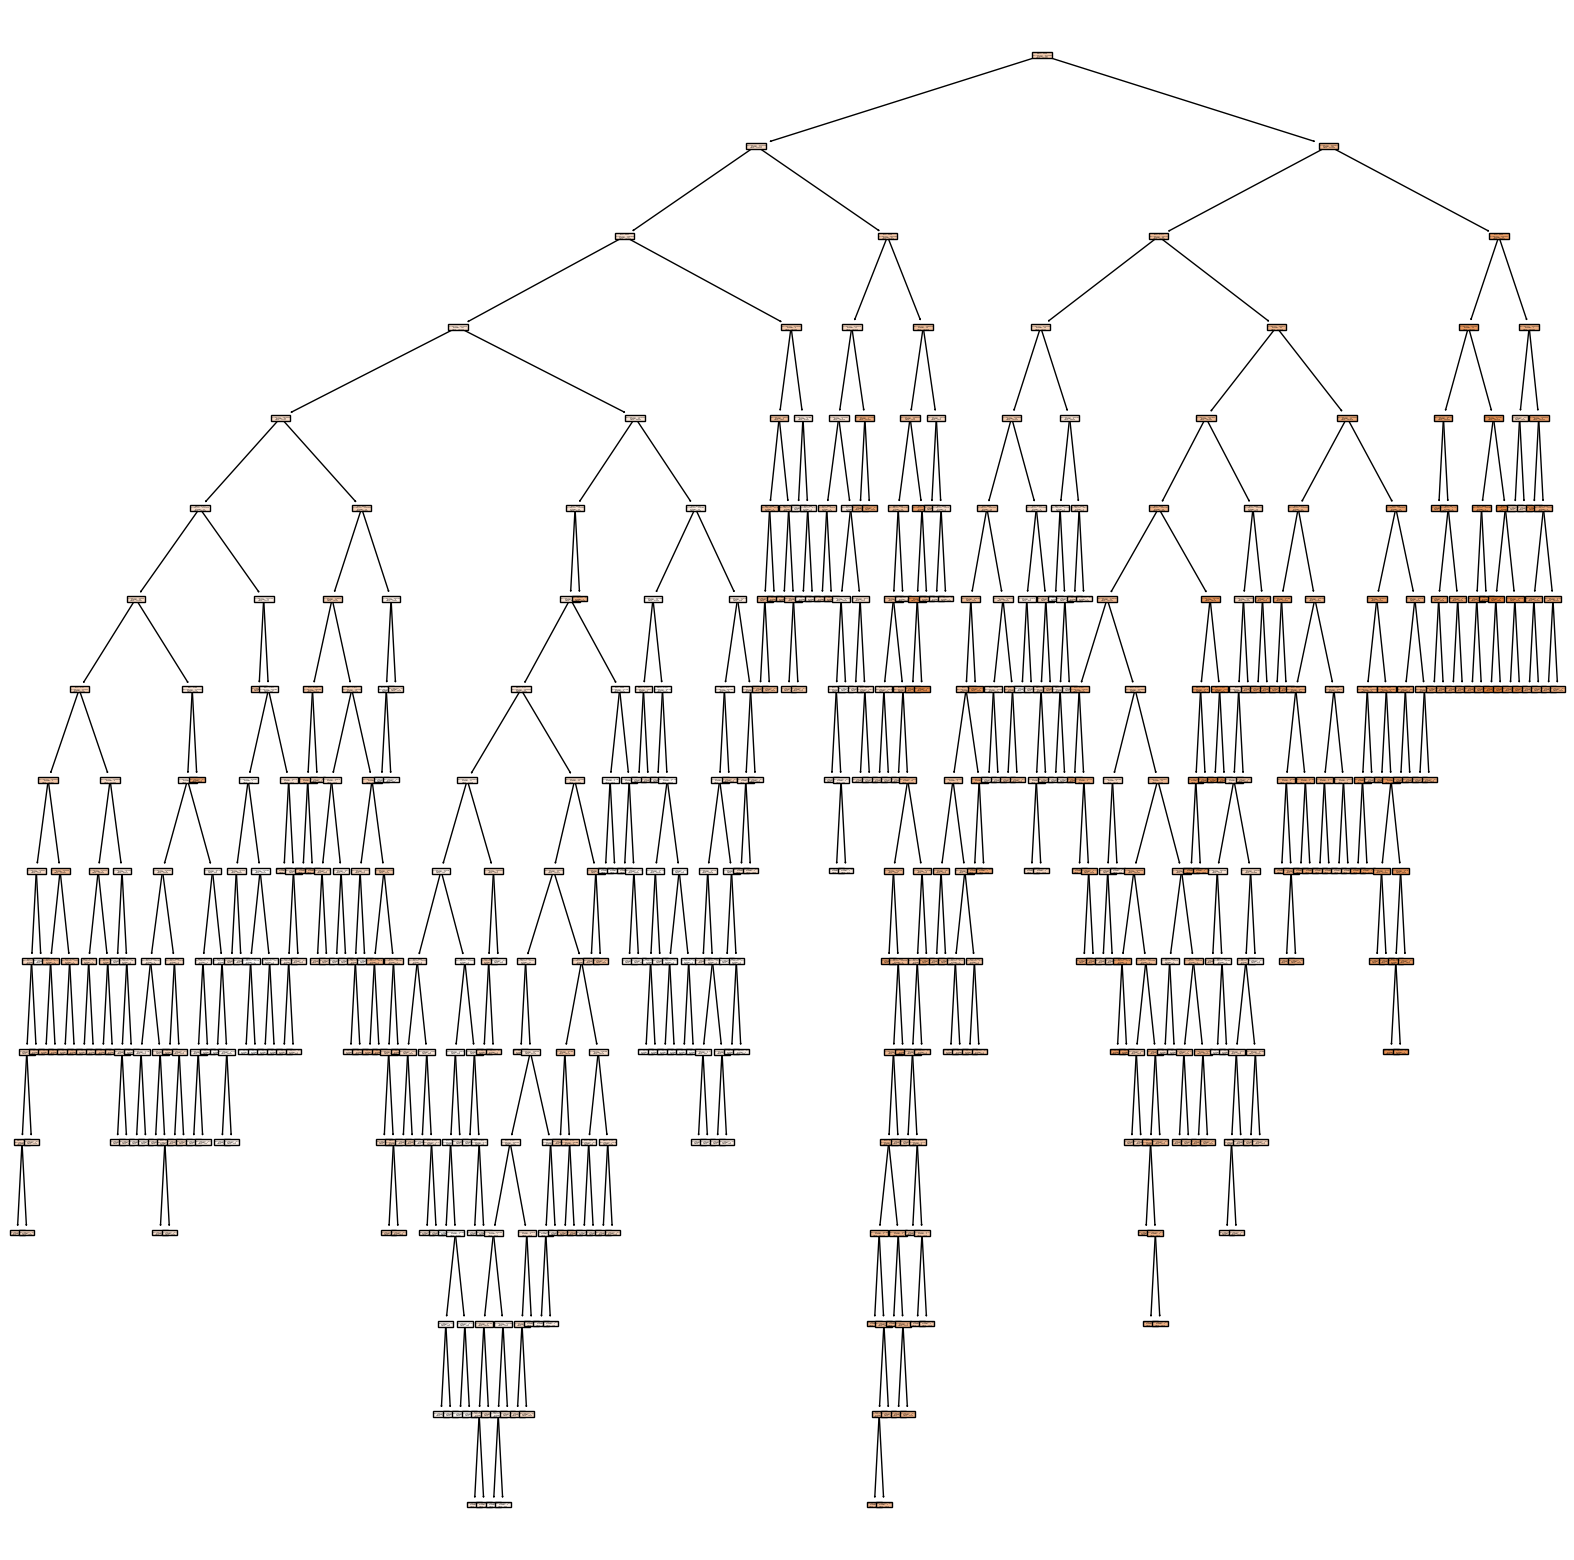

In [39]:
# Let's set the number of trees in the forest to 100 (it is a default of n_estimators)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)


plt.figure(figsize=(20, 20))
_ = plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

In [40]:
len(rf.estimators_)

100

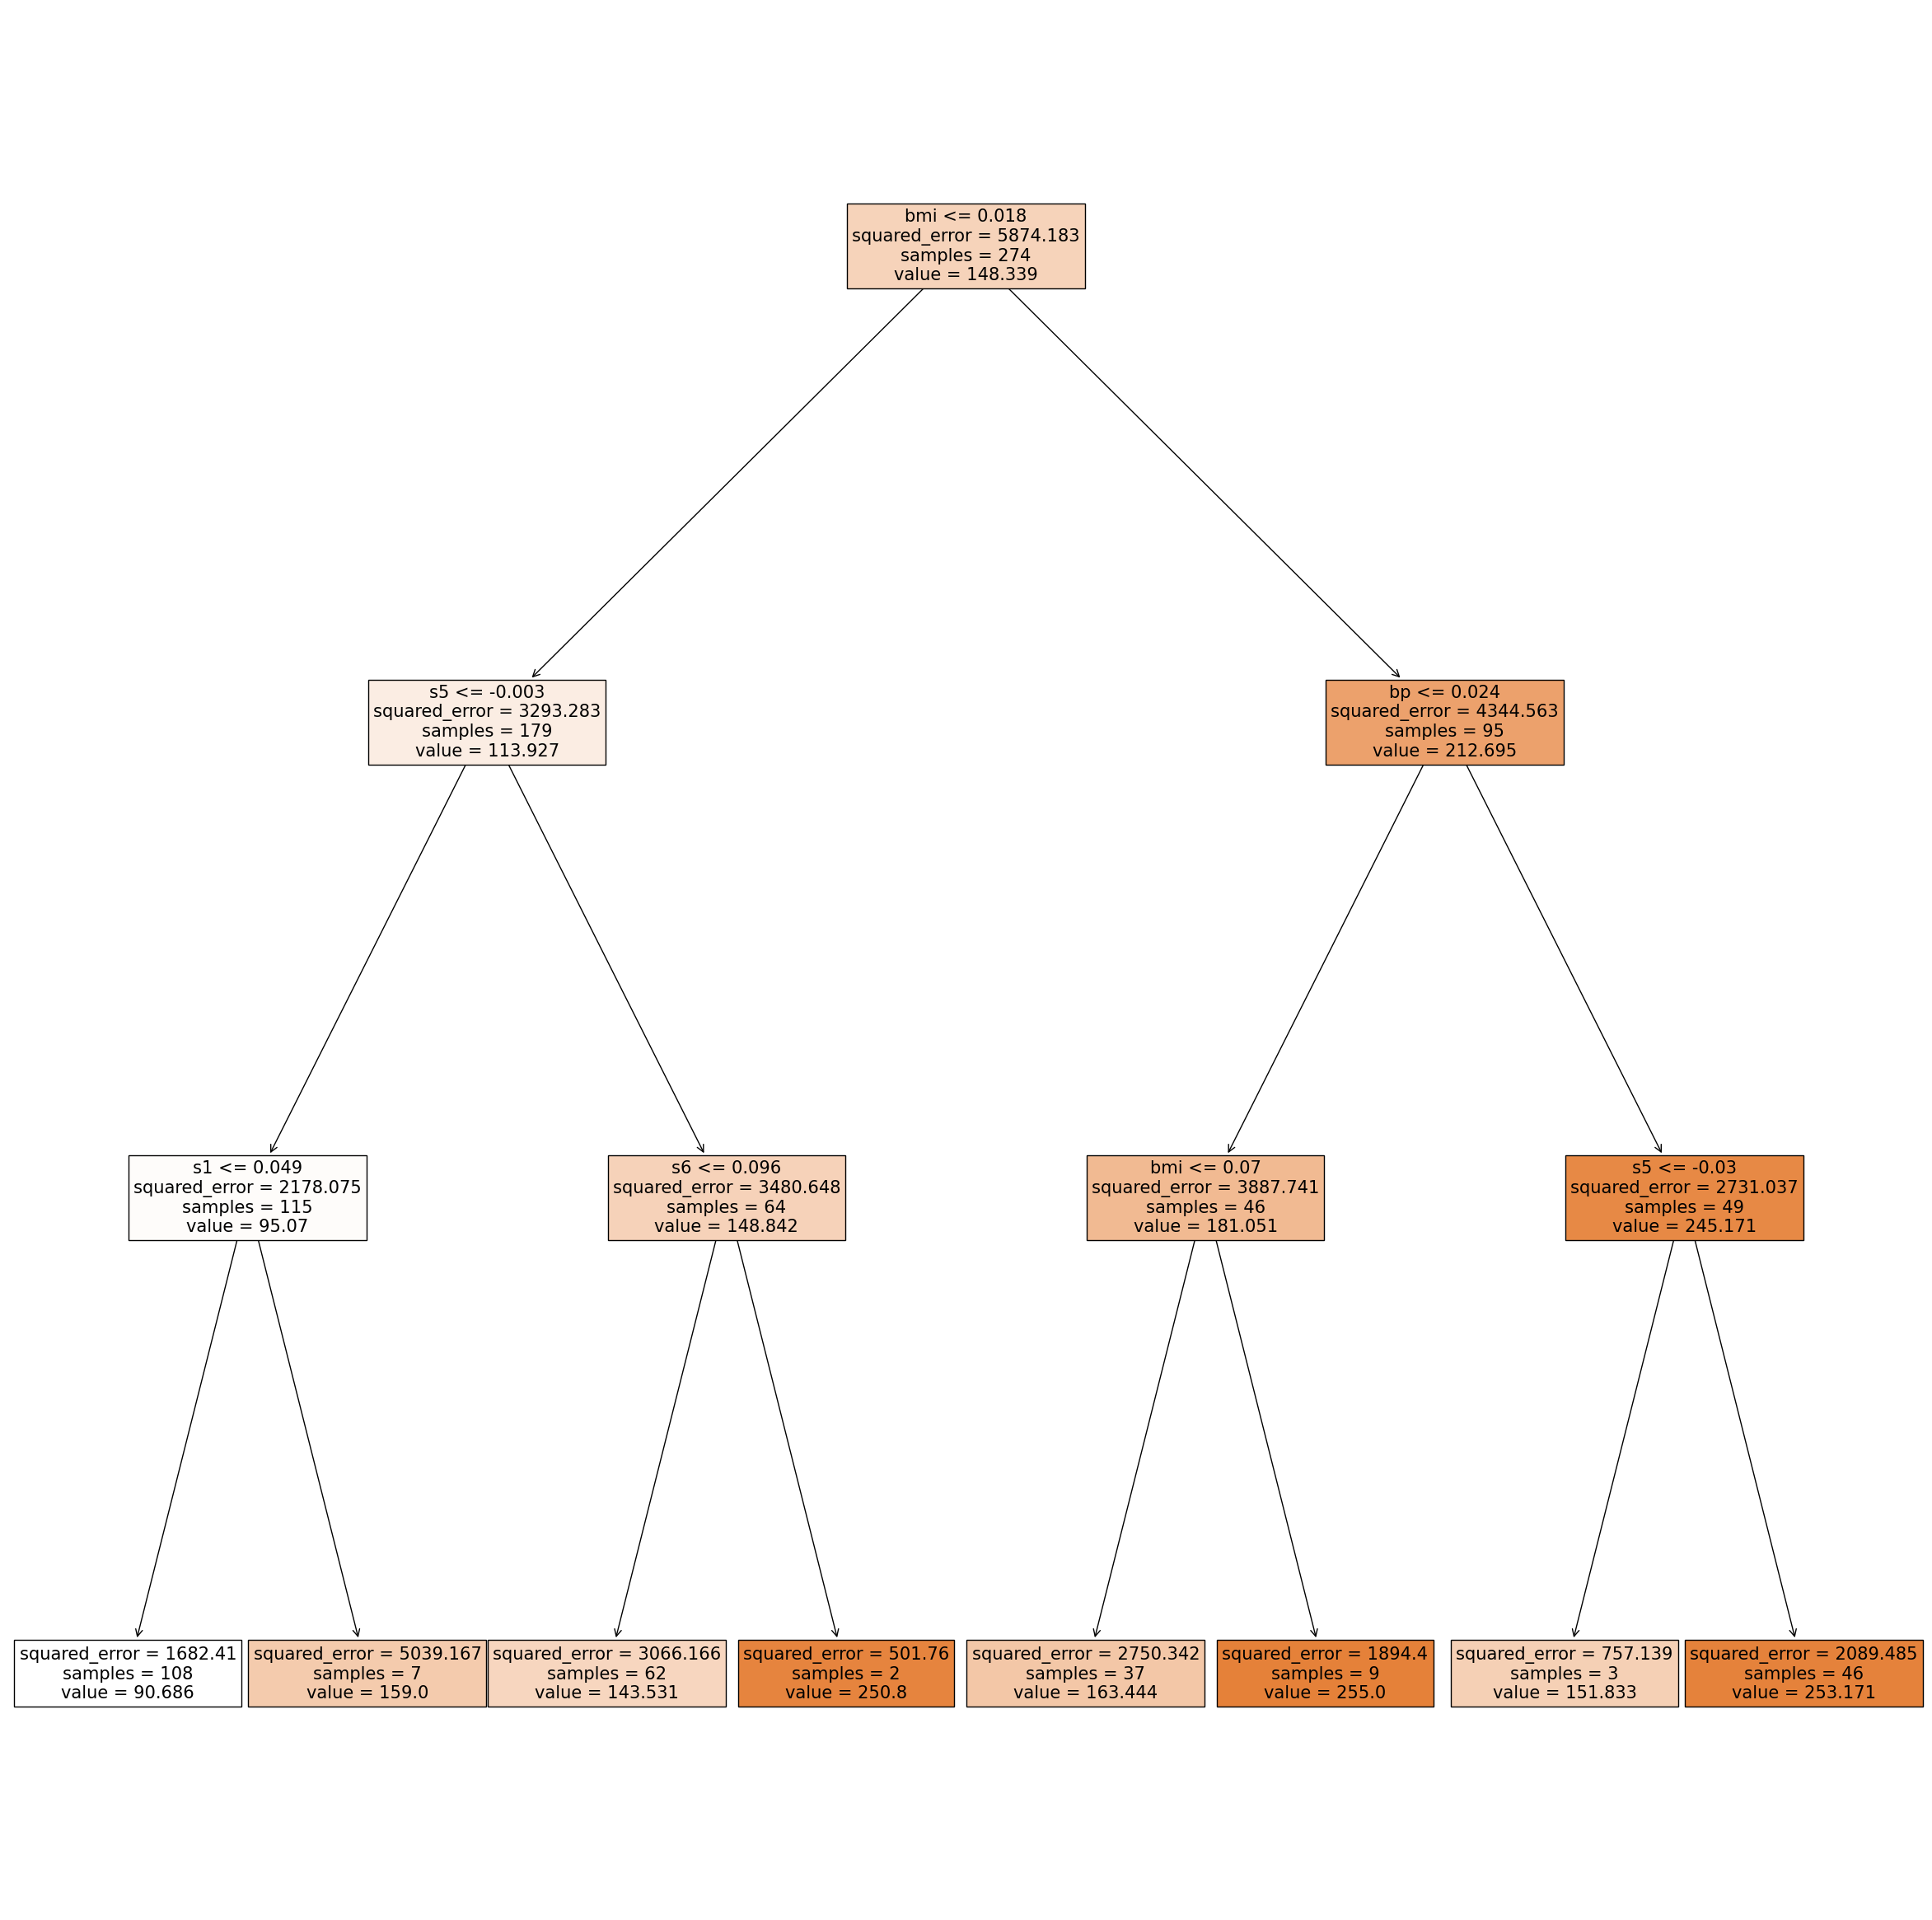

In [41]:
rf_max_depth_3 =RandomForestRegressor(n_estimators=100, max_depth=3)
rf_max_depth_3.fit(X, y)

plt.figure(figsize=(30, 30))
_ = plot_tree(rf_max_depth_3.estimators_[0], feature_names=X.columns, filled=True)

In [42]:
rf_max_depth_3.estimators_[0].tree_.max_depth

3

C:\Users\mbimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


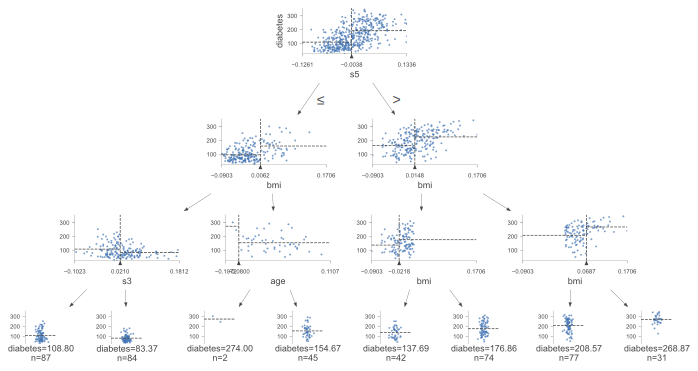

In [51]:
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(X, y)
viz_model = model(clf,
                  X_train=X, y_train=y,
                  feature_names=list(X.columns),
                  target_name='diabetes',
                  class_names=list(diabetes.target)
                  )
viz_model.view()


In [48]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_cancer = load_breast_cancer()

X_breast = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)

y_kmeans = kmeans.fit_predict(X_breast)

C:\Users\mbimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "C:\Users\mbimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


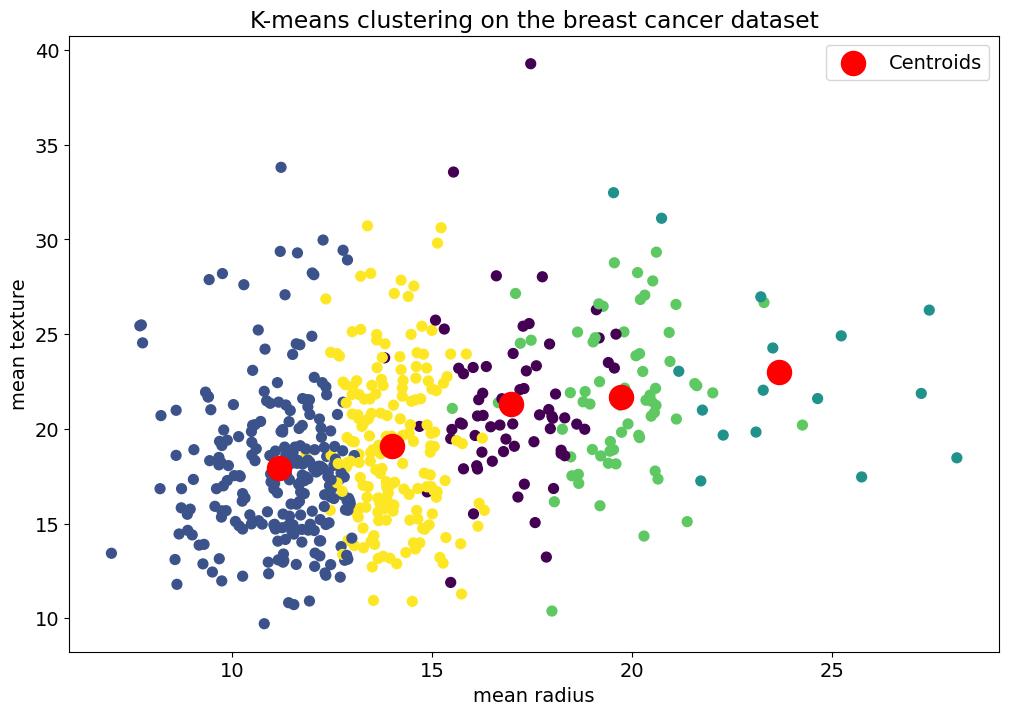

In [49]:
#visualize the clusters
plt.scatter(X_breast.iloc[:, 0], X_breast.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means clustering on the breast cancer dataset')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()